In [358]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import rcParams
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import utils

rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

In [359]:
cam_data = pd.read_pickle('../traffic_data/raw_station_segment_data.pkl')
bus_data = pd.read_pickle('../traffic_data/raw_bus_data.pkl')
bus_data_coords = pd.read_pickle('../traffic_data/raw_data_with_corrigated_coords.pkl')
cam_data_month = pd.read_parquet('../traffic_data/raw_station_segment_data_2021-12-01_2022-01-01.parquet')

In [360]:
bus_data_coords = utils.preprocess_bus_data(bus_data_coords)
bus_data = utils.preprocess_bus_data(bus_data)
bus_data = utils.day_filter(bus_data,10)

#Visualization

###Cam Data

<AxesSubplot:xlabel='timestamp', ylabel='avg_speed'>

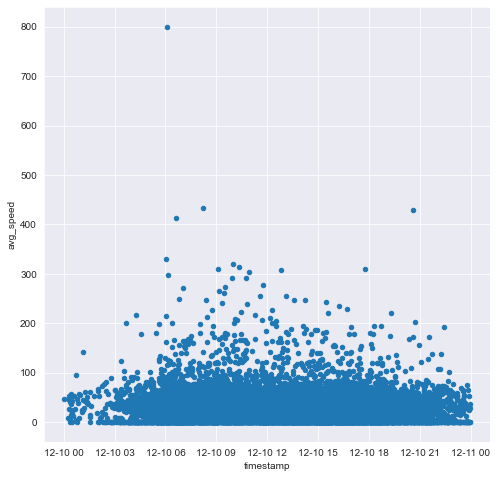

In [361]:
cam_data.plot.scatter(x='timestamp',y='avg_speed',figsize=(8,8))

<AxesSubplot:xlabel='timestamp'>

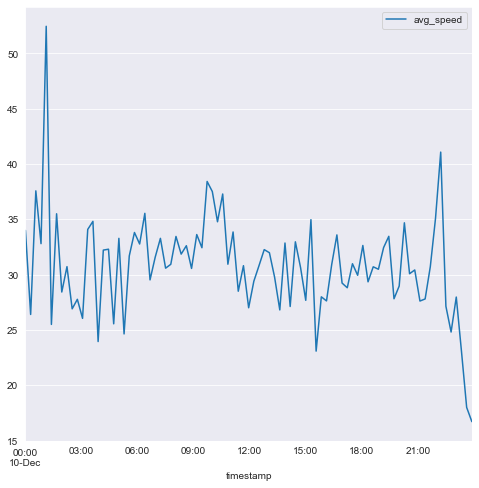

In [362]:
utils.create_speed_curve_plot_data(cam_data,'avg_speed',1000).plot.line(x='timestamp',y='avg_speed',figsize=(8,8))

<AxesSubplot:xlabel='timestamp'>

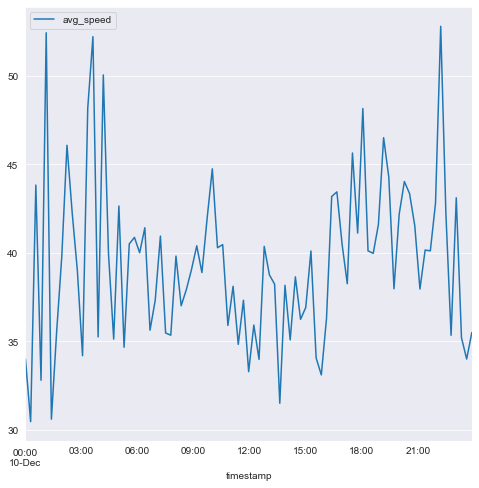

In [363]:
utils.create_speed_curve_plot_data(cam_data[cam_data['avg_speed'] != 0],'avg_speed',1000).plot.line(x='timestamp',y='avg_speed',figsize=(8,8))

<AxesSubplot:xlabel='timestamp'>

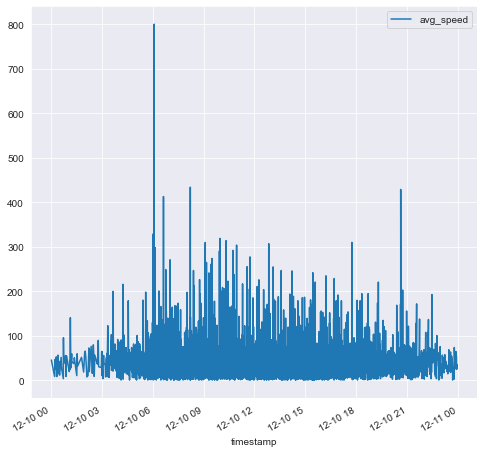

In [364]:
plot_data = cam_data[cam_data['avg_speed'] != 0]
plot_data.plot.line(x='timestamp',y='avg_speed',figsize=(8,8))

### Bus data

<AxesSubplot:xlabel='timestamp'>

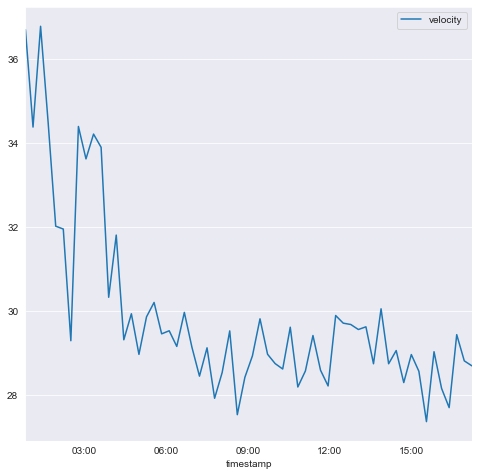

In [365]:
utils.create_speed_curve_plot_data(bus_data[bus_data['velocity']!=0],'velocity',1000).plot.line(x='timestamp',y='velocity',figsize=(8,8))

## Cam Data

In [366]:
cam_data_cleaned = utils.thresholding(daylim = 70,nightlim = 90,frame = cam_data,keepzeros=True)
len(cam_data_cleaned)

8753

In [367]:
outlier_fraction = (len(cam_data)-len(cam_data_cleaned))/(len(cam_data))

In [368]:
outlier_fraction

0.0726771903803369

In [369]:
cam_data

,timestamp,avg_speed,cam.id,cam.preset,flag
0,2021-12-10 00:02:04,46.0,cam_115,8,1
1,2021-12-10 00:13:32,9.0,cam_42,6,1
2,2021-12-10 00:14:21,47.0,cam_40,4,1
3,2021-12-10 00:17:43,26.0,cam_40,4,1
4,2021-12-10 00:19:24,53.0,cam_116,6,1
...,...,...,...,...,...
9434,2021-12-10 23:55:44,0.0,cam_115,1,1
9435,2021-12-10 23:56:26,28.0,cam_115,7,1
9436,2021-12-10 23:56:42,36.0,cam_65,5,1
9437,2021-12-10 23:58:06,0.0,cam_116,1,1


In [370]:
train_data = cam_data[['avg_speed']]

In [371]:
X_train, X_test = train_test_split(train_data, test_size=0.5, random_state=42)

In [372]:
estimator = IsolationForest(n_estimators=100,contamination=outlier_fraction*1.3,max_samples='auto')
prediction = estimator.fit_predict(train_data)

C:\Users\domon\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [373]:
print(prediction[:20])
print("Number of outliers detected: {}".format(prediction[prediction < 0].sum()))
print("Number of normal samples detected: {}".format(prediction[prediction > 0].sum()))
print(len(prediction))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Number of outliers detected: -891
Number of normal samples detected: 8548
9439


In [374]:
#train_data['timestamp'] = train_data['timestamp'].apply(pd.Timestamp)

In [375]:
normal_data = cam_data[cam_data.index.isin(np.where(prediction > 0)[0])]
outliers = cam_data[cam_data.index.isin(np.where(prediction < 0)[0])]
len(outliers)

891

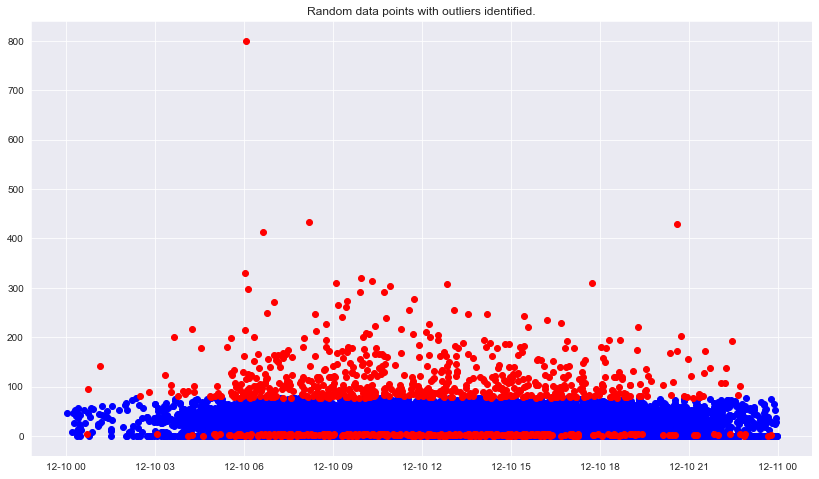

In [376]:
plt.scatter(x=normal_data['timestamp'],y=normal_data['avg_speed'],color='b')
plt.scatter(x=outliers['timestamp'],y=outliers['avg_speed'],color='r')
plt.title("Random data points with outliers identified.")
plt.show()

<AxesSubplot:xlabel='timestamp'>

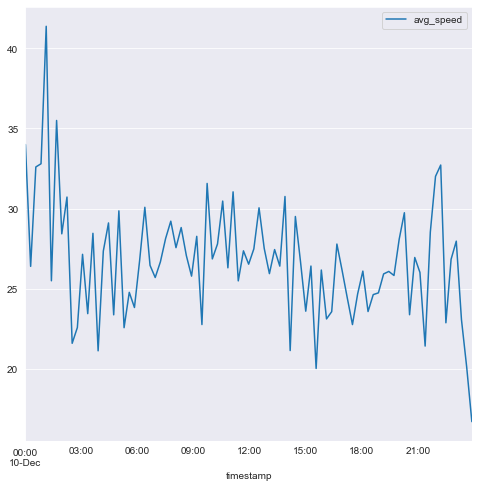

In [377]:
utils.create_speed_curve_plot_data(normal_data,'avg_speed',1000).plot.line(x='timestamp',y='avg_speed',figsize=(8,8))

In [378]:
plot_bus = utils.create_speed_curve_plot_data(bus_data,'velocity',1000)
plot_camera = utils.create_speed_curve_plot_data(normal_data,'avg_speed',1000)
plot_camera_before = utils.create_speed_curve_plot_data(cam_data,'avg_speed',1000)
plot_bus = plot_bus[plot_bus['velocity'] != 0]
plot_camera = plot_camera[plot_camera['avg_speed'] != 0]
plot_camera_before = plot_camera_before[plot_camera_before['avg_speed'] != 0]

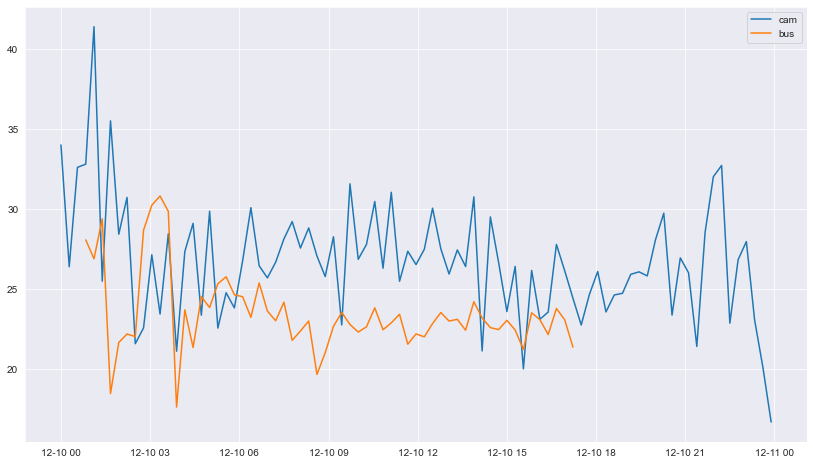

In [379]:
utils.two_line_plot(plot_bus,plot_camera)

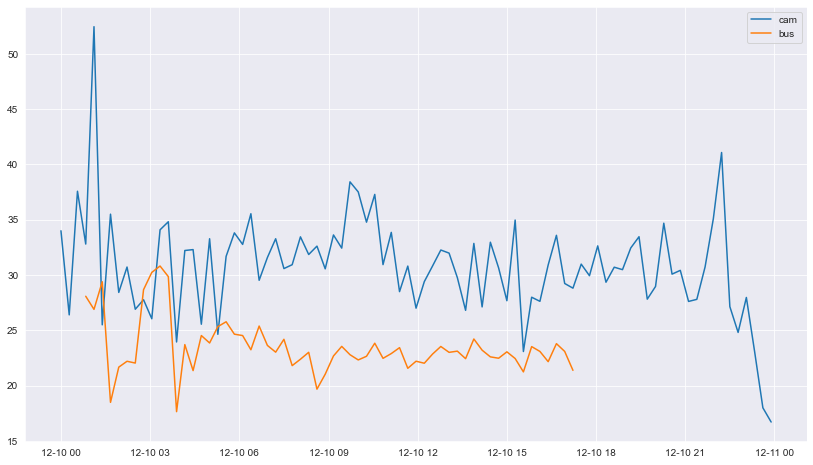

In [380]:
utils.two_line_plot(plot_bus,plot_camera_before)